# Печь Ванюкова
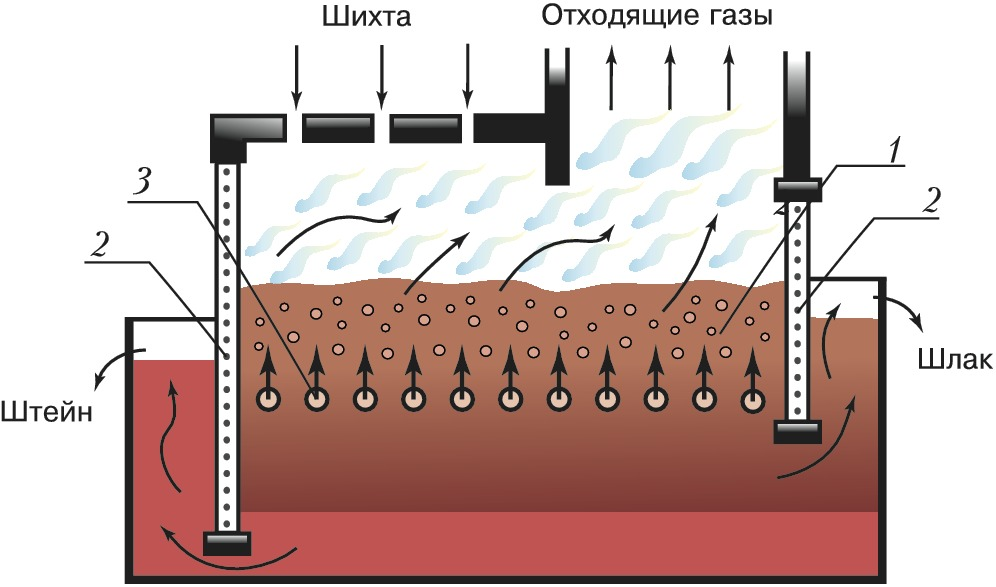
1 - ванна с расплавом, 2 - кессоны(водоохлаждаемые элементы печи для регуляции температуры), 3 - фурмы для подачи дутья


<div style="font-size: 20px">
    Ванюкова процесс(процесс плавки в расплаве)<div/><div style="font-size: 17px"> - непрерывный пирометаллургический процесс переработки природного сырья, промежуточных продуктов металлругического производства, промышленных и бытовых отходов с получением жидких и газообразных продуктов.<div/>
Печь представляет собой прямоугольную ванну (шириной 1.5-2.5 м, высотой 6-6.5 м, длиной 4-30 м), ограждение шахты выполнено из охлаждаемых водой кессонов для продления эксплуатационного цикла печи. В средней части стенок расположены фурмы для подачи дутья(воздуха, обогащенного до 90% кислородом), в торцевых стенах - сифоны для непрерывного удаления щлака и штейна. Отходящие газы поднимаются в котёл-утилизатор.

# Технология плавки
<div style="font-size: 17px">
    Перерабатываемую шихту размером частиц от 0.045 до 100 мм и кислородсодержащее дутьё подают непосредственно в ванну с расплавленным шлаком, в которой происходит плавка и окисление шихты. Дутьё разделяет шлак на верхнюю перемешиваемую газом зону и нижнюю - зону спокойного шлака. В верхней зоне дутьё создаёт энергичное турбулентное движение, благодаря которому тепло- и массообмен между твёрдыми частицами, расплавом и газом ускоряется в сотни раз. 
<div/>

<div style="font-size: 17px">
    Необходимая для плавки теплота генерируется в ходе экзометрической реакции окисления шихты ксислородом дутья и добавляетсямого углеродсодержащего топлива. В перемешиваемой зоне в результате многократных соударений происходит укрупнение образующихся капель штейна (или металла), которые опускаются через нижнюю зону спокойного шлака, образуя донный слой, а газообразные продукты плавки поднимаются снизу(от места введения дутья в расплав) вверх. 
    <div/>

<div style="font-size: 17px">
   Основное достоинство процесса Ванюкова - высокая производительность, а также возможность вести плавку до штейна или металла с полной утилизацией всех полезных составляющих сырья. В получаемом штейне содержание меди достигает 45-66%, что является очень высоким показателем. Кроме того, на выходе можно получать богатый серосодержащий отходящий газ. 
    <div/>

In [73]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualistaion
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

# Machine Learning 
from math import sqrt
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn import metrics, tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, learning_curve, cross_val_score, KFold
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.utils import resample
from statsmodels.stats.stattools import durbin_watson
from sklearn.pipeline import make_pipeline, Pipeline
from numpy.polynomial import Polynomial
import pickle

import warnings
import random

warnings.filterwarnings('ignore')

In [2]:
random.seed(21)
np.random.seed(21)

In [3]:
stein = pd.read_csv('stein.csv')
data1 = pd.read_csv('data1.csv')
data2 = pd.read_csv('data2.csv')
data3 = pd.read_csv('data3.csv')

In [4]:
stein.describe()

номер измерения         [Cu]         [Ni]         [Fe]          [S]
count      1718.000000  1718.000000  1718.000000  1718.000000  1718.000000
mean        859.500000    57.965017     3.475023    14.582014    23.280093
std         496.088198     3.083659     0.458842     2.549130     0.541035
min           1.000000    46.100000     2.350000     6.900000    20.000000
25%         430.250000    55.900000     3.120000    12.900000    23.000000
50%         859.500000    58.000000     3.455000    14.500000    23.300000
75%        1288.750000    59.900000     3.820000    16.300000    23.600000
max        1718.000000    67.500000     4.960000    24.200000    25.400000

# Data Processing

In [5]:
column_translations = {
    'номер измерения': 'Measurement ID',
    'дата': 'Date',
    'давление КВС, точка1': 'blast furnace pressure, point 1',
    'давление КВС, точка2': 'blast furnace pressure, point 2',
    'давление природный газ': 'natural gas pressure',
    'конвейер 31, производительность': 'conveyor 31, productivity',
    'конвейер 31, скорость': 'conveyor 31, speed',
    'конвейер 32, производительность': 'conveyor 32, productivity',
    'конвейер 32, скорость': 'conveyor 32, speed',
    'питатель1, уровень': 'feeder 1, level',
    'питатель1, скорость': 'feeder 1, speed',
    'питатель1, производительность': 'feeder 1, productivity',
    'питатель2, уровень': 'feeder 2, level',
    'питатель2, скорость': 'feeder 2, speed',
    'питатель2, производительность': 'feeder 2, productivity',
    'питатель3, уровень': 'feeder 3, level',
    'питатель3, скорость': 'feeder 3, speed',
    'питатель3, производительность': 'feeder 3, productivity',
    'питатель4, уровень': 'feeder 4, level',
    'питатель4, скорость': 'feeder 4, speed',
    'питатель4, производительность': 'feeder 4, productivity',
    'питатель5, уровень': 'feeder 5, level',
    'питатель5, скорость': 'feeder 5, speed',
    'питатель5, производительность': 'feeder 5, productivity',
    'питатель6, уровень': 'feeder 6, level',
    'питатель6, скорость': 'feeder 6, speed',
    'питатель6, производительность': 'feeder 6, productivity',
    'питатель7, скорость': 'feeder 7, speed',
    'питатель8, скорость': 'feeder 8, speed',
    'питатель7, уровень': 'feeder 7, level',
    'питатель8, уровень': 'feeder 8, level',
    'разрежение в аптейке': 'vacuum in the bunker',
    'расход КВС': 'blast furnace flow',
    'расход природного газа': 'natural gas flow',
    'содержание кислорода в КВС': 'oxygen content in the blast furnace',
    'температура КВС': 'blast furnace temperature',
    'температура отходящих газов в аптейке': 'temperature of outgoing gases in the bunker',
    'температура пода, шлаковый сифон': 'temperature of the feed, slag siphon',
    'температура пода, штейновый сифон': 'temperature of the feed, matte siphon',
    'температура пода, зона плавления, точка1': 'temperature of the feed, melting zone, point 1',
    'температура пода, зона плавления, точка2': 'temperature of the feed, melting zone, point 2',
    'температура природного газа': 'temperature of natural gas',
}

# Rename the columns
data1.rename(columns=column_translations, inplace=True)
data2.rename(columns=column_translations, inplace=True)
data3.rename(columns=column_translations, inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84354 entries, 0 to 84353
Data columns (total 41 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Date                                            84354 non-null  object 
 1   blast furnace pressure, point 1                 84354 non-null  float64
 2   blast furnace pressure, point 2                 84354 non-null  float64
 3   natural gas pressure                            84354 non-null  float64
 4   conveyor 31, productivity                       84354 non-null  float64
 5   conveyor 31, speed                              84354 non-null  float64
 6   conveyor 32, productivity                       84354 non-null  float64
 7   conveyor 32, speed                              84354 non-null  float64
 8   feeder 1, level                                 84354 non-null  float64
 9   feeder 1, speed                        

In [6]:
stein.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   номер измерения  1718 non-null   float64
 1   дата             1844 non-null   object 
 2   [Cu]             1718 non-null   float64
 3   [Ni]             1718 non-null   float64
 4   [Fe]             1718 non-null   float64
 5   [S]              1718 non-null   float64
dtypes: float64(5), object(1)
memory usage: 86.6+ KB


In [7]:
column_mapping = {'номер измерения':'Measurement ID','дата':'Date'}
stein.rename(columns=column_mapping, inplace=True)
stein.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Measurement ID  1718 non-null   float64
 1   Date            1844 non-null   object 
 2   [Cu]            1718 non-null   float64
 3   [Ni]            1718 non-null   float64
 4   [Fe]            1718 non-null   float64
 5   [S]             1718 non-null   float64
dtypes: float64(5), object(1)
memory usage: 86.6+ KB


In [8]:
stein[stein.isna().any(axis=1)]

Measurement ID                 Date  [Cu]  [Ni]  [Fe]  [S]
65               NaN  2008-01-06 11:00:00   NaN   NaN   NaN  NaN
66               NaN  2008-01-06 13:00:00   NaN   NaN   NaN  NaN
67               NaN  2008-01-06 15:00:00   NaN   NaN   NaN  NaN
68               NaN  2008-01-06 17:00:00   NaN   NaN   NaN  NaN
69               NaN  2008-01-06 19:00:00   NaN   NaN   NaN  NaN
...              ...                  ...   ...   ...   ...  ...
1793             NaN  2008-05-29 11:00:00   NaN   NaN   NaN  NaN
1794             NaN  2008-05-29 13:00:00   NaN   NaN   NaN  NaN
1795             NaN  2008-05-29 15:00:00   NaN   NaN   NaN  NaN
1796             NaN  2008-05-29 17:00:00   NaN   NaN   NaN  NaN
1797             NaN  2008-05-29 19:00:00   NaN   NaN   NaN  NaN

[126 rows x 6 columns]

In [9]:
# Убираем 0 и 1 неподходящюю строку 
data1 = data1.drop([0,1], axis = 0).reset_index(drop = True)
data2 = data2.drop([0,1], axis = 0).reset_index(drop = True)
data3 = data3.drop([0,1], axis = 0).reset_index(drop = True)

In [10]:
# Объединяем 3 таблицы данных в одну
data = data1.append(data2).append(data3).reset_index(drop = True)

In [11]:
# дата в данных была типа 'object' 
data['Date'] = data['Date'].astype('datetime64[ns]')
stein['Date'] = stein['Date'].astype('datetime64[ns]')
# данные со штейна снимались на день дольше, чем основные
stein = stein[stein['Date']<data['Date'].max()]

In [12]:
# Обьединяю данные со штейном
df = data.merge(stein.drop('Measurement ID', axis =1), on = 'Date' , how = 'outer')

In [13]:
df

Date  blast furnace pressure, point 1  \
0      2008-01-01 00:03:00                         94.17488   
1      2008-01-01 00:04:00                         93.11000   
2      2008-01-01 00:05:00                         96.29974   
3      2008-01-01 00:06:00                         95.09745   
4      2008-01-01 00:07:00                         94.52821   
...                    ...                              ...   
217974 2008-04-11 15:00:00                              NaN   
217975 2008-04-18 17:00:00                              NaN   
217976 2008-05-04 19:00:00                              NaN   
217977 2008-05-04 21:00:00                              NaN   
217978 2008-05-06 03:00:00                              NaN   

        blast furnace pressure, point 2  natural gas pressure  \
0                              89.90555              98.10071   
1                              88.28123              93.09038   
2                              91.65254              96.33900   
3                              90.76923              98.56690   
4                              89.78777              94.44969   
...                                 ...                   ...   
217974                              NaN                   NaN   
217975                              NaN                   NaN   
217976                              NaN                   NaN   
217977                              NaN                   NaN   
217978                              NaN                   NaN   

        conveyor 31, productivity  conveyor 31, speed  \
0                        79.04680            99.62963   
1                        78.12030            99.70370   
2                        80.74904            99.55556   
3                        77.60523            99.70370   
4                        75.12725            99.48148   
...                           ...                 ...   
217974                        NaN                 NaN   
217975                        NaN                 NaN   
217976                        NaN                 NaN   
217977                        NaN                 NaN   
217978                        NaN                 NaN   

        conveyor 32, productivity  conveyor 32, speed  feeder 1, level  \
0                             0.0               100.0         2.112779   
1                             0.0               100.0         2.132704   
2                             0.0               100.0         2.143212   
3                             0.0               100.0         2.146185   
4                             0.0               100.0         2.131316   
...                           ...                 ...              ...   
217974                        NaN                 NaN              NaN   
217975                        NaN                 NaN              NaN   
217976                        NaN                 NaN              NaN   
217977                        NaN                 NaN              NaN   
217978                        NaN                 NaN              NaN   

        feeder 1, speed  ...  temperature of outgoing gases in the bunker  \
0              20.25819  ...                                     919.8026   
1              20.25819  ...                                     919.6483   
2              20.25513  ...                                     919.6100   
3              20.24903  ...                                     919.4557   
4              20.24903  ...                                     919.3016   
...                 ...  ...                                          ...   
217974              NaN  ...                                          NaN   
217975              NaN  ...                                          NaN   
217976              NaN  ...                                          NaN   
217977              NaN  ...                                          NaN   
217978              NaN  ...                                   

In [14]:
# убраю строки только с замерами штейна, без значений аппаратов.
df[df['blast furnace pressure, point 1'].notna()].head()

Date  blast furnace pressure, point 1  \
0 2008-01-01 00:03:00                         94.17488   
1 2008-01-01 00:04:00                         93.11000   
2 2008-01-01 00:05:00                         96.29974   
3 2008-01-01 00:06:00                         95.09745   
4 2008-01-01 00:07:00                         94.52821   

   blast furnace pressure, point 2  natural gas pressure  \
0                         89.90555              98.10071   
1                         88.28123              93.09038   
2                         91.65254              96.33900   
3                         90.76923              98.56690   
4                         89.78777              94.44969   

   conveyor 31, productivity  conveyor 31, speed  conveyor 32, productivity  \
0                   79.04680            99.62963                        0.0   
1                   78.12030            99.70370                        0.0   
2                   80.74904            99.55556                        0.0   
3                   77.60523            99.70370                        0.0   
4                   75.12725            99.48148                        0.0   

   conveyor 32, speed  feeder 1, level  feeder 1, speed  ...  \
0               100.0         2.112779         20.25819  ...   
1               100.0         2.132704         20.25819  ...   
2               100.0         2.143212         20.25513  ...   
3               100.0         2.146185         20.24903  ...   
4               100.0         2.131316         20.24903  ...   

   temperature of outgoing gases in the bunker  \
0                                     919.8026   
1                                     919.6483   
2                                     919.6100   
3                                     919.4557   
4                                     919.3016   

   temperature of the feed, slag siphon  \
0                              0.011426   
1                              0.035913   
2                              0.005095   
3                              0.000000   
4                              0.000000   

   temperature of the feed, matte siphon  \
0                               322.3917   
1                               322.6865   
2                               322.8336   
3                               323.1280   
4                               323.3487   

   temperature of the feed, melting zone, point 1  \
0                                        513.1042   
1                                        513.3568   
2                                        513.5372   
3                                        513.7177   
4                                        513.9341   

   temperature of the feed, melting zone, point 2  temperature of natural gas  \
0                                        497.1181                    35.29891   
1                                        496.8715                    35.31971   
2                                        496.7272                    35.29891   
3                                        496.5839                    35.29891   
4                                        496.3657                    35.27818   

   [Cu]  [Ni]  [Fe]  [S]  
0   NaN   NaN   NaN  NaN  
1   NaN   NaN   NaN  NaN  
2   NaN   NaN   NaN  NaN  
3   NaN   NaN   NaN  NaN  
4   NaN   NaN   NaN  NaN  

[5 rows x 45 columns]

In [15]:
df1 = data.merge(stein.drop('Measurement ID', axis =1), on = 'Date' , how = 'inner') # простое обьединение значений
                                                                                     # c одним и тем же временем

In [16]:
df1 = df1.dropna().reset_index(drop = True)
df1.head()

Date  blast furnace pressure, point 1  \
0 2008-01-01 01:00:00                         97.57563   
1 2008-01-01 03:00:00                         96.97694   
2 2008-01-01 05:00:00                         97.31064   
3 2008-01-01 07:00:00                         96.77084   
4 2008-01-01 09:00:00                         98.65033   

   blast furnace pressure, point 2  natural gas pressure  \
0                         92.91371              99.08217   
1                         92.14818              94.77848   
2                         92.36410              90.27850   
3                         91.86356              96.07891   
4                         94.38589              94.76867   

   conveyor 31, productivity  conveyor 31, speed  conveyor 32, productivity  \
0                   76.45261            99.40741                        0.0   
1                   73.87099            99.70370                        0.0   
2                   78.19254            99.25926                        0.0   
3                   68.95585            99.25926                        0.0   
4                   53.46925            99.55556                        0.0   

   conveyor 32, speed  feeder 1, level  feeder 1, speed  ...  \
0               100.0         3.976667         20.25208  ...   
1               100.0         4.040802         24.25916  ...   
2               100.0         1.364270         22.25410  ...   
3               100.0         3.823516         21.26530  ...   
4               100.0         1.053408          0.00000  ...   

   temperature of outgoing gases in the bunker  \
0                                     913.9077   
1                                     911.1365   
2                                     909.9440   
3                                     910.2903   
4                                     907.3678   

   temperature of the feed, slag siphon  \
0                              0.044893   
1                              0.000000   
2                              0.023056   
3                              0.000000   
4                              0.000000   

   temperature of the feed, matte siphon  \
0                               330.1903   
1                               329.2344   
2                               329.3814   
3                               328.3155   
4                               327.2856   

   temperature of the feed, melting zone, point 1  \
0                                        519.5614   
1                                        519.2008   
2                                        520.5351   
3                                        523.9964   
4                                        520.7154   

   temperature of the feed, melting zone, point 2  temperature of natural gas  \
0                                        497.8037                    35.46500   
1                                        496.6901                    35.40271   
2                                        495.5406                    34.53092   
3                                        510.5779                    34.28186   
4                                        497.0496                    32.53829   

   [Cu]  [Ni]  [Fe]   [S]  
0  65.1  3.73   9.0  22.0  
1  64.6  3.74   9.4  22.2  
2  61.6  3.65  10.9  22.8  
3  59.2  3.52  13.6  23.1  
4  55.0  3.49  16.9  23.8  

[5 rows x 45 columns]

In [17]:
# буду использовать таблицу, полученную простым объединением данных в одно и то же время
# Создаю столбец совместной работы двух конвейеров
df1['Total charge rate, t/h'] = df1['conveyor 31, productivity'].values\
                                                        + df1['conveyor 32, productivity'].values

In [18]:
# Столбец среднего двух точек измерений температур
df1['Temperature of feed in the smelting zone, °C'] = (df1['temperature of the feed, melting zone, point 1']\
                                        +df1['temperature of the feed, melting zone, point 2'])/2

In [19]:
df1.rename(columns={'temperature of outgoing gases in the bunker':'Temperature of exhaust gases in the off-gas duct, °C','blast furnace flow':'Overall blast volume, m3/h','oxygen content in the blast furnace':'Oxygen content in the blast (degree of oxygen enrichment in the blowing), %'}\
           ,inplace=True)

In [20]:
df1.columns

Index(['Date', 'blast furnace pressure, point 1',
       'blast furnace pressure, point 2', 'natural gas pressure',
       'conveyor 31, productivity', 'conveyor 31, speed',
       'conveyor 32, productivity', 'conveyor 32, speed', 'feeder 1, level',
       'feeder 1, speed', 'feeder 1, productivity', 'feeder 2, level',
       'feeder 2, speed', 'feeder 2, productivity', 'feeder 3, level',
       'feeder 3, speed', 'feeder 3, productivity', 'feeder 4, level',
       'feeder 4, speed', 'feeder 4, productivity', 'feeder 5, level',
       'feeder 5, speed', 'feeder 5, productivity', 'feeder 6, level',
       'feeder 6, speed', 'feeder 6, productivity', 'feeder 7, speed',
       'feeder 8, speed', 'feeder 7, level', 'feeder 8, level',
       'vacuum in the bunker', 'Overall blast volume, m3/h',
       'natural gas flow',
       'Oxygen content in the blast (degree of oxygen enrichment in the blowing), %',
       'blast furnace temperature',
       'Temperature of exhaust gases in the off-g

In [21]:
train_df = df1[['Total charge rate, t/h','Overall blast volume, m3/h','Oxygen content in the blast (degree of oxygen enrichment in the blowing), %',\
         'Temperature of exhaust gases in the off-gas duct, °C','Temperature of feed in the smelting zone, °C','[Cu]']]
# Чистка выбросов
df_corr = train_df[(train_df['Total charge rate, t/h']>25) & (train_df['Overall blast volume, m3/h']>20000) & (train_df['Oxygen content in the blast (degree of oxygen enrichment in the blowing), %'] > 40)\
      & (train_df['Temperature of exhaust gases in the off-gas duct, °C'] > 0) & (train_df['Temperature of feed in the smelting zone, °C'] > 300)]

In [22]:
df_corr.corr()

Total charge rate, t/h  \
Total charge rate, t/h                                            1.000000   
Overall blast volume, m3/h                                        0.632156   
Oxygen content in the blast (degree of oxygen e...                0.690943   
Temperature of exhaust gases in the off-gas duc...               -0.162457   
Temperature of feed in the smelting zone, °C                     -0.148992   
[Cu]                                                             -0.044839   

                                                    Overall blast volume, m3/h  \
Total charge rate, t/h                                                0.632156   
Overall blast volume, m3/h                                            1.000000   
Oxygen content in the blast (degree of oxygen e...                    0.578462   
Temperature of exhaust gases in the off-gas duc...                    0.008355   
Temperature of feed in the smelting zone, °C                          0.187119   
[Cu]                                                                 -0.138787   

                                                    Oxygen content in the blast (degree of oxygen enrichment in the blowing), %  \
Total charge rate, t/h                                                                       0.690943                             
Overall blast volume, m3/h                                                                   0.578462                             
Oxygen content in the blast (degree of oxygen e...                                           1.000000                             
Temperature of exhaust gases in the off-gas duc...                                           0.022185                             
Temperature of feed in the smelting zone, °C                                                -0.000900                             
[Cu]                                                                                        -0.149945                             

                                                    Temperature of exhaust gases in the off-gas duct, °C  \
Total charge rate, t/h                                                                      -0.162457      
Overall blast volume, m3/h                                                                   0.008355      
Oxygen content in the blast (degree of oxygen e...                                           0.022185      
Temperature of exhaust gases in the off-gas duc...                                           1.000000      
Temperature of feed in the smelting zone, °C                                                -0.033582      
[Cu]                                                                                        -0.068991      

                                                    Temperature of feed in the smelting zone, °C  \
Total charge rate, t/h                                                                 -0.148992   
Overall blast volume, m3/h                                                              0.187119   
Oxygen content in the blast (degree of oxygen e...                                     -0.000900   
Temperature of exhaust gases in the off-gas duc...                                     -0.033582   
Temperature of feed in the smelting zone, °C                                            1.000000   
[Cu]                                                                                   -0.170929   

                                                        [Cu]  
Total charge rate, t/h                             -0.044839  
Overall blast volume, m3/h                         -0.138787  
Oxygen content in the blast (degree of oxygen e... -0.149945  
Temperature of exhaust gases in the off-gas duc... -0.068991  
Temperature of feed in the smelting zone, °C       -0.170929  
[Cu]                                                1.000000

In [23]:
X = train_df[['Total charge rate, t/h','Overall blast volume, m3/h','Oxygen content in the blast (degree of oxygen enrichment in the blowing), %',\
         'Temperature of exhaust gases in the off-gas duct, °C','Temperature of feed in the smelting zone, °C']]
Y = train_df['[Cu]']

In [24]:
X

Total charge rate, t/h  Overall blast volume, m3/h  \
0                   76.45261                    27150.63   
1                   73.87099                    27466.18   
2                   78.19254                    27479.74   
3                   68.95585                    27797.56   
4                   53.46925                    26586.83   
...                      ...                         ...   
1696               158.62750                    28072.38   
1697               133.32320                    28974.39   
1698               138.47074                    28164.39   
1699               122.01995                    28984.59   
1700               113.62810                    29820.05   

      Oxygen content in the blast (degree of oxygen enrichment in the blowing), %  \
0                                              72.09357                             
1                                              62.58325                             
2                                              63.20353                             
3                                              66.92718                             
4                                              70.66064                             
...                                                 ...                             
1696                                           90.62347                             
1697                                           88.27975                             
1698                                           86.76831                             
1699                                           88.34453                             
1700                                           71.13567                             

      Temperature of exhaust gases in the off-gas duct, °C  \
0                                             913.90770      
1                                             911.13650      
2                                             909.94400      
3                                             910.29030      
4                                             907.36780      
...                                                 ...      
1696                                           61.45247      
1697                                           61.26754      
1698                                           59.04742      
1699                                           57.34385      
1700                                           54.93419      

      Temperature of feed in the smelting zone, °C  
0                                        508.68255  
1                                        507.94545  
2                                        508.03785  
3                                        517.28715  
4                                        508.88250  
...                                            ...  
1696                                     522.22645  
1697                                     523.79485  
1698                                     516.63620  
1699                                     512.10710  
1700                                     484.49650  

[1701 rows x 5 columns]

Нормальность

Линейность

Гомоскедастичность

Автокорреляция

# First train, StandardScaler


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [26]:
# BASE RATE 
base_rate = [stein['[Cu]'].mean()] * (y_test.size)
print(f"RMSE = {mean_squared_error(y_test, base_rate)}")

RMSE = 8.861819602010911


In [27]:
# Создание оценщика и score функции
def rmse(y_actual, y_predicted):
    return mean_squared_error(y_actual, y_predicted,squared=False)
rmse_scorer_train = make_scorer(rmse, greater_is_better=False)
rmse_scorer_plot = make_scorer(rmse)
def score_mae_rmse(pipeline):
    y_pred = pipeline.fit(X_train,y_train).predict(X_test)
    RMSE = mean_squared_error(y_test,y_pred,squared=False)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    return [MAE, RMSE]

In [28]:
def err_DF():
    models = [lin_regr, lin_sgd, dec_tree, rand_forest]
    arr_MAE =[]
    arr_RMSE=[]
    for model in models:
        MAE, RMSE = score_mae_rmse(model)
        arr_MAE.append(MAE)
        arr_RMSE.append(RMSE)
    return round(pd.DataFrame({'Model':['LinearRegression','SGD','DT','RF'],'MAE':arr_MAE,'RMSE':arr_RMSE}),3)   

In [29]:
#Linear Regression 
lin_regr = Pipeline([('scaler', StandardScaler()), ('model',LinearRegression())])
#SGD
lin_sgd = Pipeline([('scaler', StandardScaler()), ('model',SGDRegressor(tol = 0.0001, eta0 = 0.01,random_state=0))])
#Decision Tree
search_tree = RandomizedSearchCV(tree.DecisionTreeRegressor(), {'max_depth':range(2,10),\
                                                      'min_samples_split':range(1,10),'min_samples_leaf':range(2,10),\
                                                      'random_state':[0]},n_jobs =-1)
dec_tree = Pipeline([('scaler', StandardScaler()), ('model',search_tree)])
#Random Forest
search_forest = RandomizedSearchCV(RandomForestRegressor(), {'n_estimators':[500,600,700,900,1000,1200,1400,1600,1800,2000],\
                                                             'max_depth':range(1,10),'min_samples_split':range(2,20),\
                                                             'min_samples_leaf':range(2,20),\
                                                             'random_state':[0]},n_jobs =-1,scoring=rmse_scorer_plot)
rand_forest = Pipeline([('scaler', StandardScaler()), ('model',search_forest)])

In [30]:
df_errors = err_DF()

In [72]:
df_errors

Model    MAE   RMSE
0  LinearRegression  2.282  2.899
1               SGD  2.286  2.903
2                DT  2.357  3.074
3                RF  2.255  2.877

In [31]:
# Проверка на автокорреляцию
# Около 2 - автокорреляция отсутствует 
# Perform Durbin-Watson test
dw_result = durbin_watson(y_train-lin_regr.fit(X_train,y_train).predict(X_train))
dw_result

1.9281932267449913

In [32]:
# Функция для построения графиков на bootstrap выборках для коэффициентов линейных моделей
def lin_coef_plot(pipeline, model_name):
    n_bootstraps = 1000 
    bootstrap_X = [] 
    bootstrap_y = [] 
    for _ in range(n_bootstraps):
        sample_X, sample_Y = resample(X, Y)
        bootstrap_X.append(sample_X)
        bootstrap_y.append(sample_Y)
    coeffs = []
    for i, data in enumerate(bootstrap_X):
        pipeline.fit(data, bootstrap_y[i])
        coeffs.append(pipeline['model'].coef_)
    coef_df = pd.DataFrame(coeffs, columns = list(X))
    coef_df.plot(kind= 'box')
    plt.title(f'Coefficient values {model_name}')
    plt.xticks(rotation = 90);        

In [33]:
# Функция построения графиков коэффициентов нелинейных моделей
def woody_coefs_plot(pipeline, model_name):
    feature_importances = pipeline['model'].best_estimator_.feature_importances_
    indices = np.argsort(feature_importances)
    fig, ax = plt.subplots()
    ax.barh(range(len(feature_importances)), feature_importances[indices])
    ax.set_yticks(range(len(feature_importances)))
    _=ax.set_yticklabels(np.array(list(X))[indices])
    plt.title(f'Feature importances {model_name}');

In [34]:
# КРИВЫЕ ОБУЧЕНИЯ
def plot_learning_curve(estimator, model_name, X, y, ylim=None, cv=5, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.Figure()
    plt.title(f"Learning curve {model_name}")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Train examples")
    plt.ylabel("RMSE")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes, scoring=rmse_scorer_plot)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train RMSE")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="C-V RMSE")

    plt.legend(loc="best")
    return plt

Все не переобучены кроме RF, как помочь:

RF:

Получите больше данных для обучения

Попробуйте меньший набор показателей

Используйте менее сложную модель

Добавьте регуляризацию

Остальные:

Попробуйте увеличить число показателей

Перейдите на более сложную модель



# Second Train, Polynomial Features + Standard Scaler

In [35]:
#Linear Regression 
lin_regr = Pipeline([('poly', PolynomialFeatures()),('scaler', StandardScaler()), ('model',LinearRegression())])
#SGD
lin_sgd = Pipeline([('poly', PolynomialFeatures()),('scaler', StandardScaler()), ('model',SGDRegressor(tol = 0.0001, eta0 = 0.01,random_state=0))])
#Decision Tree
dec_tree = Pipeline([('poly', PolynomialFeatures()),('scaler', StandardScaler()), ('model',search_tree)])
#Random Forest
rand_forest = Pipeline([('poly', PolynomialFeatures()),('scaler', StandardScaler()), ('model',search_forest)])

In [36]:
df_errors_poly = err_DF()

In [37]:
#DF прироста производительности
df_diff_percent = df_errors[['MAE','RMSE']] - df_errors_poly[['MAE','RMSE']]
df_diff_percent['MAE'] = (df_diff_percent['MAE']/ df_errors['MAE'])*100
df_diff_percent['RMSE'] = (df_diff_percent['RMSE']/ df_errors['RMSE'])*100
df_diff_percent['Model'] = df_errors_poly['Model']
df_diff_percent

MAE      RMSE             Model
0  4.951797  3.311487  LinearRegression
1 -0.349956 -0.826731               SGD
2  6.957997  9.921926                DT
3  1.906874  2.572124                RF

In [38]:
df_errors_poly

Model    MAE   RMSE
0  LinearRegression  2.169  2.803
1               SGD  2.294  2.927
2                DT  2.193  2.769
3                RF  2.212  2.803

# Графики итогов

In [39]:
y_pred_lin = lin_regr.fit(X_train,y_train).predict(X_test)
y_pred_sgd = lin_sgd.fit(X_train,y_train).predict(X_test)
y_pred_tree = dec_tree.fit(X_train,y_train).predict(X_test)
y_pred_forest = rand_forest.fit(X_train,y_train).predict(X_test)

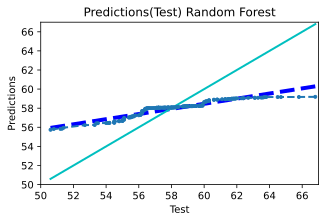

In [40]:
%config InlineBackend.figure_format = 'svg' #графики чётче
from pylab import rcParams
rcParams['figure.figsize'] = 5, 3

### TO DO - def prediction_plot(predictions, title):
fig, ax = plt.subplots()

#approx line
approximation = Polynomial.fit(y_test.sort_values(), pd.Series(y_pred_forest).sort_values(), 1)
ax.plot(y_test.sort_values(), approximation(y_test.sort_values()),linestyle='dashed', color="b",linewidth=4)
#y=x
ax.plot(y_test.sort_values(), y_test.sort_values(),'c', marker='o',linewidth=2, markersize= 0)

ax.plot(y_test.sort_values(), pd.Series(y_pred_forest).sort_values(), marker='o', linestyle='dashed',linewidth=2, markersize= 3)
plt.title('Predictions(Test) Random Forest')
plt.xlabel('Test')
plt.ylabel('Predictions')

ax.set(xlim= (50,67), ylim=(50,67), \
       xticks=np.arange(50, 67,2), yticks=np.arange(50, 67,2))

plt.show()


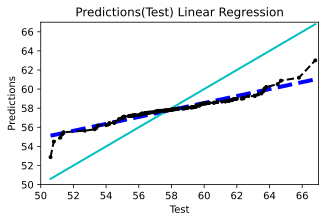

In [41]:
fig, ax = plt.subplots()
#approx line
approximation = Polynomial.fit(y_test.sort_values(), pd.Series(y_pred_lin).sort_values(), 1)
ax.plot(y_test.sort_values(), approximation(y_test.sort_values()),linestyle='dashed', color='b',linewidth=4)
#y=x
ax.plot(y_test.sort_values(), y_test.sort_values(),'c', marker='o',linewidth=2, markersize= 0)

ax.plot(y_test.sort_values(), pd.Series(y_pred_lin).sort_values(),'black' , marker='o', linestyle='dashed',linewidth=2, markersize= 3)
plt.title('Predictions(Test) Linear Regression')
plt.xlabel('Test')
plt.ylabel('Predictions')

ax.set(xlim= (50,67), ylim=(50,67), \
       xticks=np.arange(50, 67,2), yticks=np.arange(50, 67,2))

plt.show()

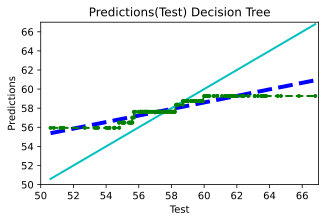

In [42]:
fig, ax = plt.subplots()
#approx line
approximation = Polynomial.fit(y_test.sort_values(), pd.Series(y_pred_tree).sort_values(), 1)
ax.plot(y_test.sort_values(), approximation(y_test.sort_values()),linestyle='dashed', color='b',linewidth=4)
#y=x
ax.plot(y_test.sort_values(), y_test.sort_values(),'c', marker='o',linewidth=2, markersize= 0)

ax.plot(y_test.sort_values(), pd.Series(y_pred_tree).sort_values(),'green' , marker='o', linestyle='dashed',linewidth=2, markersize= 3)
plt.title('Predictions(Test) Decision Tree')
plt.xlabel('Test')
plt.ylabel('Predictions')

ax.set(xlim= (50,67), ylim=(50,67), \
       xticks=np.arange(50, 67,2), yticks=np.arange(50, 67,2))

plt.show()

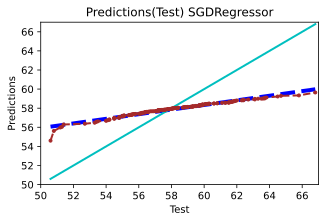

In [43]:
fig, ax = plt.subplots()
#approx line
approximation = Polynomial.fit(y_test.sort_values(), pd.Series(y_pred_sgd).sort_values(), 1)
ax.plot(y_test.sort_values(), approximation(y_test.sort_values()),linestyle='dashed', color='b',linewidth=4)
#y=x
ax.plot(y_test.sort_values(), y_test.sort_values(),'c', marker='o',linewidth=2, markersize= 0)

ax.plot(y_test.sort_values(), pd.Series(y_pred_sgd).sort_values(),'brown' , marker='o', linestyle='dashed',linewidth=2, markersize= 3)
plt.title('Predictions(Test) SGDRegressor')
plt.xlabel('Test')
plt.ylabel('Predictions')

ax.set(xlim= (50,67), ylim=(50,67), \
       xticks=np.arange(50, 67,2), yticks=np.arange(50, 67,2))

plt.show()

# Точечные графики признаков

# Графики предсказаний


# Графики остатков, проверка на гетероскедастичность

# Save model for deployment

In [75]:
filename = 'DT_model.sav'
pickle.dump(dec_tree, open(filename, 'wb'))

# Pipeline and Feature Selection

In [49]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [50]:
#выбор фичей из RF, резултат хуже
pipe = make_pipeline(PolynomialFeatures(),StandardScaler(),SelectFromModel(estimator=RandomForestRegressor()),LinearRegression())
preddd = pipe.fit(X_train,y_train).predict(X_test)
metrics.mean_squared_error(y_test,preddd,squared=False)

2.8731383119399223

In [51]:
# пример работы SelectFromModel
selector = SelectFromModel(estimator=RandomForestRegressor()).fit(X_train,y_train)
selector.estimator_.feature_importances_

array([0.15700792, 0.21943077, 0.17986336, 0.22219269, 0.22150526])

In [52]:
selector.threshold_

0.2

In [53]:
selector.transform(X_train)

array([[29000.03   ,   655.8153 ,   490.20035],
       [26189.85   ,   297.9852 ,   478.4903 ],
       [29758.26   ,   808.1775 ,   584.7233 ],
       ...,
       [27216.81   ,    91.58196,   524.37455],
       [26750.29   ,   283.5011 ,   488.858  ],
       [24439.21   ,   596.7159 ,   475.88405]])

Перебор фичей

Начинаем с полного пространства признаков и выкидываем признаки по одному, пока это не портит качество модели или пока не достигнуто желаемое число признаков.

In [54]:
from sklearn.feature_selection import SequentialFeatureSelector
selector = SequentialFeatureSelector(LinearRegression(), scoring='neg_mean_squared_error',cv=5, n_features_to_select=3, n_jobs=-1)
selector.fit(X_train_poly, y_train_poly)

NameError: name 'X_train_poly' is not defined

In [ ]:
selector.transform(X_train_poly)

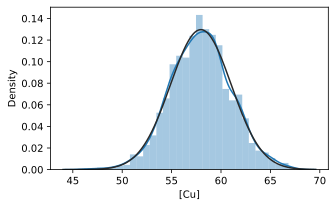

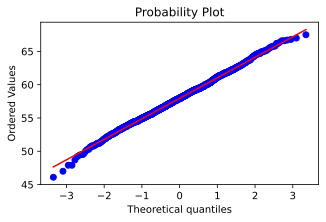

In [55]:
#NORMALITY
#consider normality of all features
from scipy.stats import norm
from scipy import stats
sns.distplot(Y, fit=norm);
fig = plt.figure()
res = stats.probplot(Y, plot=plt)

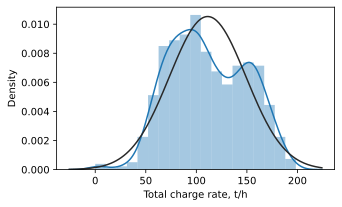

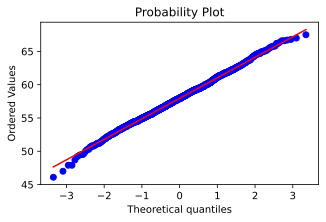

In [56]:
#Does np.log helped - NOPE
sns.distplot(X.iloc[:,0], fit=norm);
fig = plt.figure()
res = stats.probplot(Y, plot=plt)

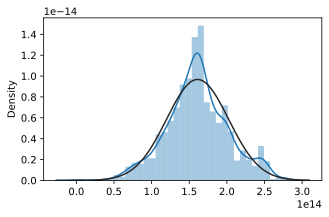

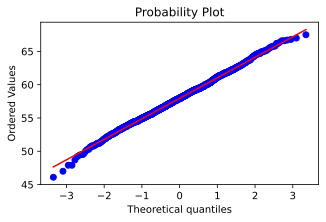

In [57]:
#NOPE
sns.distplot(stats.boxcox(X.iloc[:,1])[0], fit=norm);
fig = plt.figure()
res = stats.probplot(Y, plot=plt)

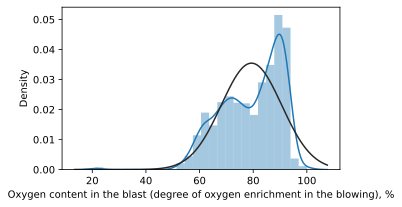

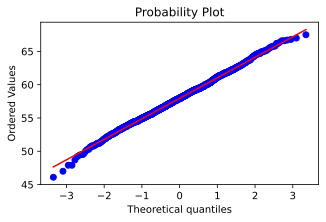

In [58]:
#NOPE
sns.distplot(X.iloc[:,2], fit=norm);
fig = plt.figure()
res = stats.probplot(Y, plot=plt)

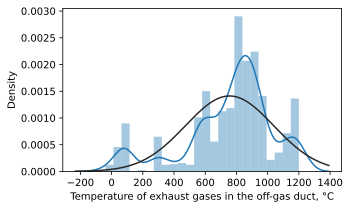

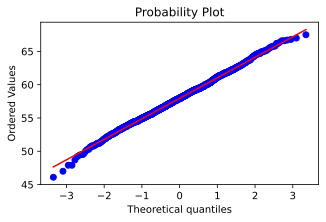

In [59]:
#YES
sns.distplot(X.iloc[:,3], fit=norm);
fig = plt.figure()
res = stats.probplot(Y, plot=plt)

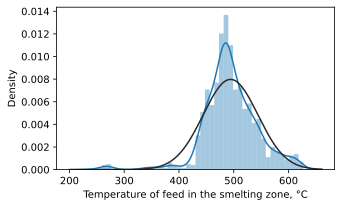

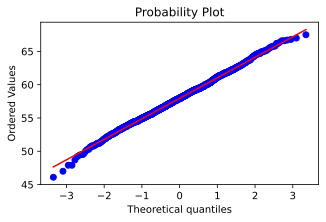

In [60]:
#NOPE
sns.distplot(X.iloc[:,4], fit=norm);
fig = plt.figure()
res = stats.probplot(Y, plot=plt)

In [61]:
#test T-SNE
from sklearn.manifold import TSNE
import plotly.express as px
embed = TSNE(random_state =42, perplexity=10.0,n_jobs=-1,n_iter=5000)

In [62]:
X_embedded = embed.fit_transform(X)
print('New Shape of X: ', X_embedded.shape)
print('Kullback-Leibler divergence after optimization: ', embed.kl_divergence_)
print('No. of iterations: ', embed.n_iter_)

New Shape of X:  (1701, 2)
Kullback-Leibler divergence after optimization:  0.46075648069381714
No. of iterations:  4999


In [71]:
# Создание диаграммы разброса
fig = px.scatter(None, x=X_embedded[:,0], y=X_embedded[:,1], 
                 labels={
                     "x": "Dimension 1",
                     "y": "Dimension 2",
                 },
                 opacity=1, color=X_embedded[:,1].astype(str))

# Изменение цвета фона графика
fig.update_layout(dict(plot_bgcolor = 'white'))

# Обновление линий осей
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Установка названия рисунка
fig.update_layout(title_text="t-SNE")

# Обновление размера маркера
fig.update_traces(marker=dict(size=3))

fig.show()

In [64]:
# уменьшаем размерность и проверяем на RF
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=.3,random_state=42)
search_forest.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': range(1, 10),
                                        'min_samples_leaf': range(2, 20),
                                        'min_samples_split': range(2, 20),
                                        'n_estimators': [500, 600, 700, 900,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000],
                                        'random_state': [0]},
                   scoring=make_scorer(rmse))

In [66]:
preds = search_forest.predict(X_test)
metrics.mean_absolute_error(y_test, preds)

2.3023731276542514

In [70]:
df_errors

Model    MAE   RMSE
0  LinearRegression  2.282  2.899
1               SGD  2.286  2.903
2                DT  2.357  3.074
3                RF  2.255  2.877

In [67]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
def plotly_df(df, title = ''):
    data = []

    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)

    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

In [68]:
df1=pd.read_csv('df1.csv', index_col=['дата'],parse_dates=['дата'])

In [69]:
plotly_df(df1[['[Cu]','[Fe]']], title = "Cu")